# CSPB 3022 Project

## Author: Adam Fowler
***

## Project Topic

This project explores a dataset with various attributes of a person in order to determine if they are likely to get a job that pays $50k or more using binary classification. While this is primarily a classification exercise, if regression is applicable I would like to apply that as well.

The goal of this project is to be able to correctly classify these instances. My motivation is simply to learn the techniques involved.

This project and related files will be stored at [https://github.com/cockytrumpet/classification_project](https://github.com/cockytrumpet/classification_project)

## Data

The dataset used is available from [Kaggle](https://www.kaggle.com/datasets/galshochat/classification-problem-yes-or-no-50k-salary). No information is given on how the data was gathered.

>Gal Shochat. (2022). Classification problem/ Yes or NO 50K salary, Version 1. Retrieved April 5, 2023 from https://www.kaggle.com/datasets/galshochat/classification-problem-yes-or-no-50k-salary.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('adult.data');
print(f'{df.shape = }')
df.head()

df.shape = (32560, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The data is tabulated with 32560 samples and 15 features. 

| Feature | Type |
|-|-|
| Age | Integer |
| Workclass | Category |
| fnwlgt | Integer |
| Education | Name of education level |
| Education-year | Numerical education level |
| Marital-Status | Category |
| Occupation | Category |
| Relationship | Category |
| Race | Category |
| Sex | Boolean |
| Capital-gain | Integer |
| Capital-loss | Integer |
| Hours-per-week | Integer |
| Native_country | Category |
| Salary | Binary (for prediciton >=$50k) |

## Data Cleaning

The data doesn't have a header, but the variables are listed on Kaggle. I'll add them here.

In [116]:
columns = [ 'Age', 'Workclass' , 'fnlwgt', 'Education', 'Education-year', 'Marital-Status', 
            'Occupation', 'Relationship', 'Race', 'Sex' , 'Capital-gain', 
            'Capital-loss', 'Hours-per-week', 'Native_country', 'Salary']

df.columns = columns
df.head()

,Age,Workclass,fnlwgt,Education,Education-year,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


There don't appear to be any missing values to deal with.

In [117]:
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-year    0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native_country    0
Salary            0
dtype: int64

The *Education* and *Education-year* features are redundant. The year seems like it will be easier to work with, so I will drop the other.

In [118]:
df = df.drop(['Education'], axis=1)
df.rename(columns={'Education-year': 'Education'}, inplace=True)

The target variable *Salary* will be easier to work with if it's not a string, so I'm going to convert it to binary.

In [119]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [120]:
df['50k'] = np.nan
df.loc[df['Salary'].str.contains('<'), '50k'] = 0
df.loc[df['Salary'].str.contains('>'), '50k'] = 1
df = df.astype({'50k': int})
df = df.drop(['Salary'], axis=1)
df['50k'].unique()

array([0, 1])

The variable *fnlwgt* is a census metric that only applies when comparing people from the same state, so I'm going to drop that as well as variables that I don't intend to use.

In [121]:
df = df.drop(['fnlwgt','Capital-gain','Capital-loss','Relationship','Native_country'], axis=1)

The categorical variables have extra whitespace throughout. I'm going to remove it.

In [122]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.strip()

df.head()

,Age,Workclass,Education,Marital-Status,Occupation,Race,Sex,Hours-per-week,50k
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,0
1,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,0
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,0
3,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,40,0
4,37,Private,14,Married-civ-spouse,Exec-managerial,White,Female,40,0


## EDA (and more cleaning)

Of the different *workclasses* available, it seems to make sense to limit the analysis to the private sector jobs.

In [123]:
df['Workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [124]:
private = df.loc[df['Workclass'] == 'Private']
private = private.drop(['Workclass'], axis=1)
positive = private.loc[private['50k'] == 1]
negative = private.loc[private['50k'] == 0]
print(f'{positive.shape = }')
print(f'{negative.shape = }')

positive.shape = (4963, 8)
negative.shape = (17733, 8)


In [125]:
private.describe()

,Age,Education,Hours-per-week,50k
count,22696.000000,22696.000000,22696.000000,22696.000000
mean,36.797585,9.879714,40.267096,0.218673
std,12.827721,2.495500,11.256298,0.413355
min,17.000000,1.000000,1.000000,0.000000
25%,26.000000,9.000000,40.000000,0.000000
50%,35.000000,10.000000,40.000000,0.000000
75%,45.000000,11.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000


### Distribution of numeric variables

I will plot the frequencies of the numeric variables to get a sense of their distribution.

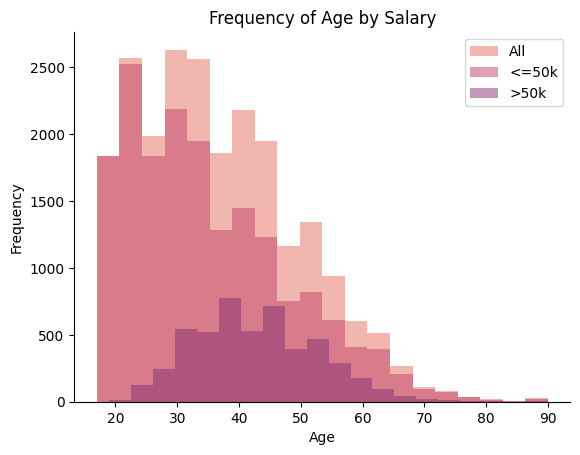

In [126]:
sns.set_palette('flare', 3)
plt.hist(private['Age'], bins=20 ,alpha=0.5, label='All')
plt.hist(negative['Age'], bins=20, alpha=0.5, label='<=50k')
plt.hist(positive['Age'], bins=20, alpha=0.5, label='>50k')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Age by Salary')
plt.legend(loc='upper right')
sns.despine()
plt.show()

There is heavy scew in the overall data and <=50k group. This makes sense as it seems unlikely for an 18 year old with no college to be making more than $50k/year. The > $50k/year group seems more normally distributed. There is considerable overlap between the two groups, so this variable may have limited predictive value.

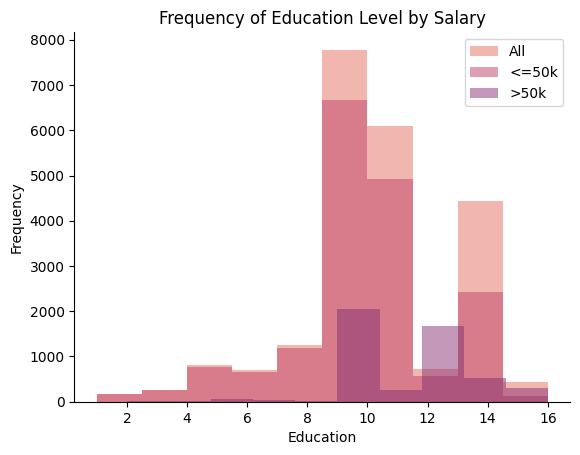

In [132]:
plt.hist(private['Education'], alpha=0.5, label='All')
plt.hist(negative['Education'], alpha=0.5, label='<=50k')
plt.hist(positive['Education'], alpha=0.5, label='>50k')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Frequency of Education Level by Salary')
plt.legend(loc='upper right')
sns.despine()
plt.show()

On this scale, *9* indicates a high-school graduate while a *13* indicates a bachelors degree. This variable appears to be a strong indicator for the target variable. Very few in the >50k group are below *9*.


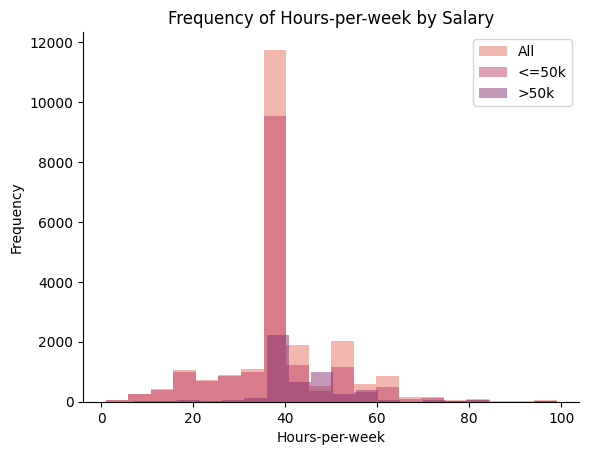

In [133]:
plt.hist(private['Hours-per-week'], bins=20, alpha=0.5, label='All')
plt.hist(negative['Hours-per-week'], bins=20, alpha=0.5, label='<=50k')
plt.hist(positive['Hours-per-week'], bins=20, alpha=0.5, label='>50k')
plt.xlabel('Hours-per-week')
plt.ylabel('Frequency')
plt.title('Frequency of Hours-per-week by Salary')
plt.legend(loc='upper right')
sns.despine()
plt.show()

The 40-hour work week is well represented in both groups. This variable might also have predictive value as very few in the >50k group work less than 40 hours/week.

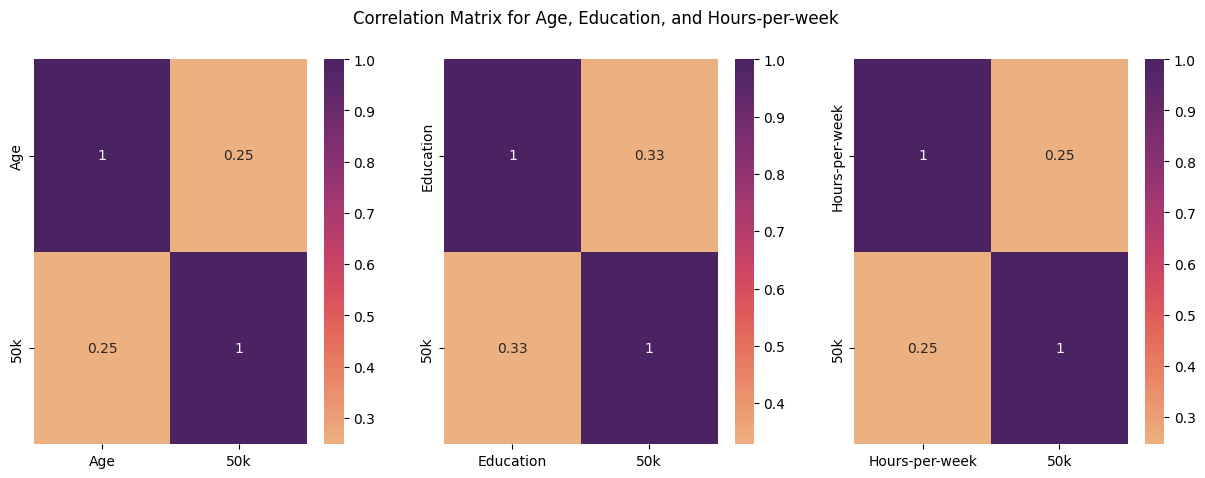

In [134]:
age = private[['Age', '50k']]
education = private[['Education', '50k']]
hours = private[['Hours-per-week', '50k']]

age = age.corr()
education = education.corr()
hours = hours.corr()

fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.heatmap(age, annot=True, ax=ax[0], cmap='flare')
sns.heatmap(education, annot=True, ax=ax[1], cmap='flare')
sns.heatmap(hours, annot=True, ax=ax[2], cmap='flare')
fig.suptitle('Correlation Matrix for Age, Education, and Hours-per-week')
plt.show()

Individually, the numeric variables seem to only have very weak correlation to the >50k target variable.

### Distribution of Categorical Variables

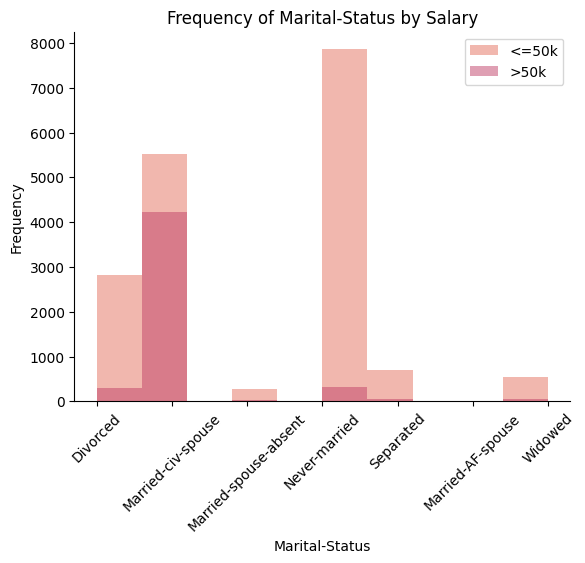

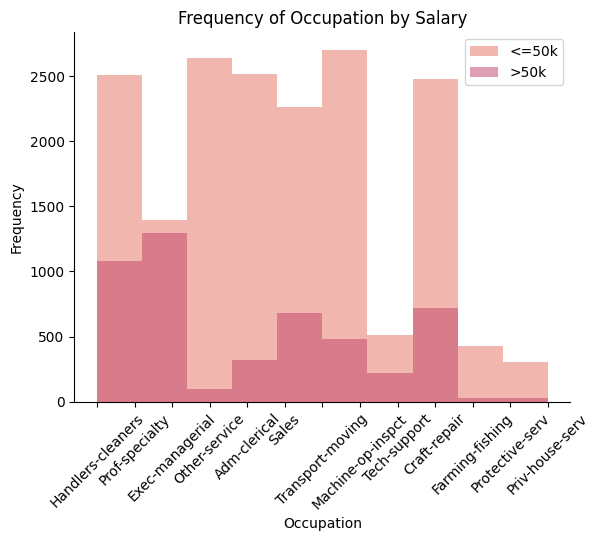

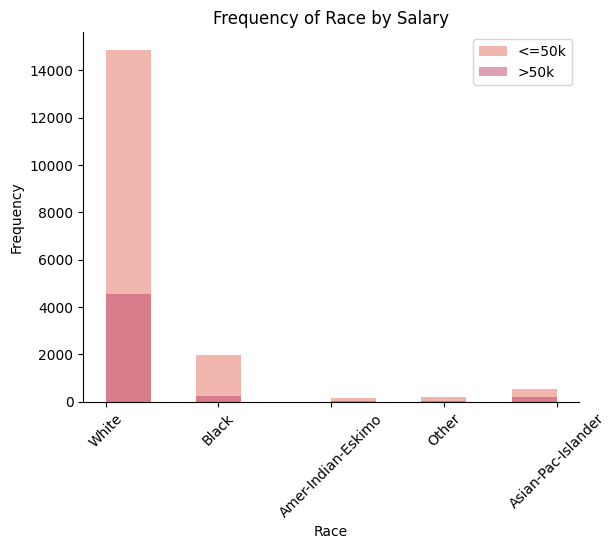

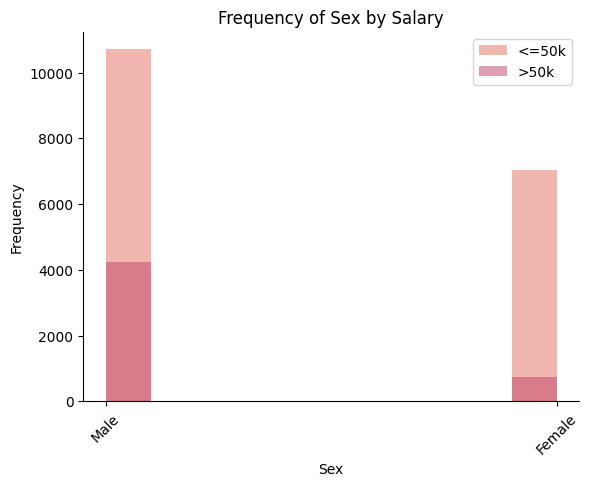

In [135]:
for col in private.columns:
    if private[col].dtype == object:
        plt.hist(negative[col], alpha=0.5, label='<=50k')
        plt.hist(positive[col], alpha=0.5, label='>50k')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.ylabel('Frequency')
        plt.title(f'Frequency of {col} by Salary')
        plt.legend(loc='upper right')
        sns.despine()
        plt.show()

Some of the occupations listed (it seems to be a very limited cross section of society) have a very high certainty of being in the >50k group. The other variables show very strong indicators that can be used for prediction. (e.g. married, white, male)

### Outliers

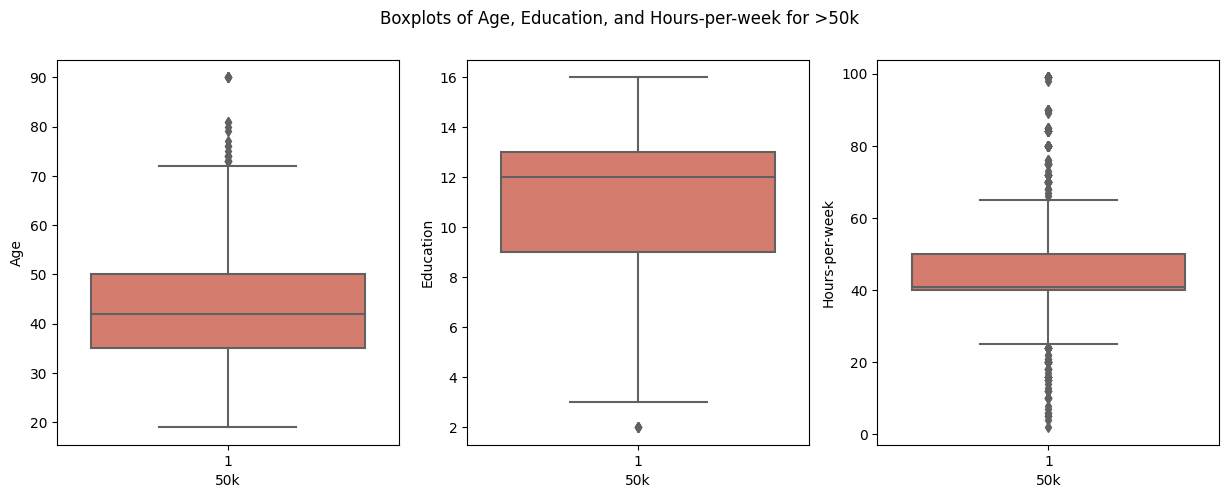

In [131]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='50k', y='Age', data=positive, ax=ax[0])
sns.boxplot(x='50k', y='Education', data=positive, ax=ax[1])
sns.boxplot(x='50k', y='Hours-per-week', data=positive, ax=ax[2])
fig.suptitle('Boxplots of Age, Education, and Hours-per-week for >50k')
plt.show()

There are outliers in all three of the numeric variables. Age doesn't appear to have much predictive value and the criterion for *Education* seems to be a value greater than *9* (high-school graduate) so I don't feel the need to remove them from the data set. I might need to set some bounds for *Hours-per-week*. (more to follow)

### EDA Conclusions

There is still analysis to be done, especially with the categorical variables. 

Even though individually the numeric variables showed only weak correlation to the target variable, in combination I believe *Education*, *Hours-per-week*, and the categorical variables will have predictive power.

Further cleaning may be required. Candidates for cleaning are the removal of outliers from *Hours-per-week* and the binning of *Marital Status* into married/not married.

## Model Approach



I'm familiar with the Naive Bayes model for this sort of problem and I think it is well suited to it. I'm open to ideas for other models as we explore the topic in the next few weeks.